## Import Libraries

Include the libraries as required

In [1]:
import pandas as pd
import numpy as np

import zipfile

# For Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score

In [2]:
cleaned_shipping_data = pd.read_csv("Cleaned_Shipping_Details.csv")
cleaned_shipping_data.head()

,Unnamed: 0,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,...,scheduled_year,scheduled_month,scheduled_day,scheduled_dateofmonth,delivery_year,delivery_month,delivery_day,delivery_dateofmonth,delta,state
0,0,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,...,2015,6,6,7,2015,6,2,3,-4,OH
1,1,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,...,2017,3,0,6,2017,3,6,5,-1,WY
2,2,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,...,2015,3,0,9,2015,3,6,8,-1,WA
3,3,0.12,9.0,8.0,664.0,Aluminium,5.81,16.31,No,No,...,2015,5,6,24,2015,5,2,20,-4,KY
4,4,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,...,2016,12,6,18,2016,12,2,14,-4,PA


In [3]:
shipping_data_copy = cleaned_shipping_data.copy()

#### Drop the first auto-increment column

In [4]:
shipping_data_copy.drop(columns=shipping_data_copy.columns[0], axis=1,  inplace=True)

In [5]:
shipping_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6495 entries, 0 to 6494
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Artist Reputation      6495 non-null   float64
 1   Height                 6495 non-null   float64
 2   Width                  6495 non-null   float64
 3   Weight                 6495 non-null   float64
 4   Material               6495 non-null   object 
 5   Price Of Sculpture     6495 non-null   float64
 6   Base Shipping Price    6495 non-null   float64
 7   International          6495 non-null   object 
 8   Express Shipment       6495 non-null   object 
 9   Installation Included  6495 non-null   object 
 10  Transport              6495 non-null   object 
 11  Fragile                6495 non-null   object 
 12  Customer Information   6495 non-null   object 
 13  Remote Location        6495 non-null   object 
 14  Cost                   6495 non-null   float64
 15  sche

In [6]:
shipping_data_copy.describe()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost,scheduled_year,scheduled_month,scheduled_day,scheduled_dateofmonth,delivery_year,delivery_month,delivery_day,delivery_dateofmonth,delta
count,6495.000000,6495.000000,6495.000000,6.495000e+03,6495.000000,6495.000000,6.495000e+03,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000
mean,0.460234,21.652656,9.461586,3.587429e+05,1143.329810,37.397477,1.357170e+04,2016.837105,6.230023,2.986297,15.587221,2016.837413,6.224326,3.000000,15.602771,-0.042340
std,0.249996,11.617190,5.174982,2.523480e+06,8597.637494,26.874433,1.258482e+05,1.349791,3.388515,1.996755,8.731039,1.349258,3.390328,1.996455,8.719945,2.428952
min,0.000000,3.000000,2.000000,3.000000e+00,3.000000,10.000000,8.607000e+01,2015.000000,1.000000,0.000000,1.000000,2015.000000,1.000000,0.000000,1.000000,-4.000000
25%,0.270000,13.000000,6.000000,5.510000e+02,5.230000,16.700000,2.267750e+02,2016.000000,3.000000,1.000000,8.000000,2016.000000,3.000000,1.000000,8.000000,-2.000000
50%,0.450000,20.000000,8.000000,3.232000e+03,8.020000,23.490000,4.578400e+02,2017.000000,6.000000,3.000000,15.000000,2017.000000,6.000000,3.000000,15.000000,0.000000
75%,0.640000,29.000000,11.000000,3.542300e+04,88.635000,57.910000,1.362920e+03,2018.000000,9.000000,5.000000,23.000000,2018.000000,9.000000,5.000000,23.000000,2.000000
max,1.000000,73.000000,50.000000,1.179279e+08,382385.670000,99.980000,3.792938e+06,2019.000000,12.000000,6.000000,31.000000,2019.000000,12.000000,6.000000,31.000000,4.000000


Text(0.5, 1.0, 'Heat Map')

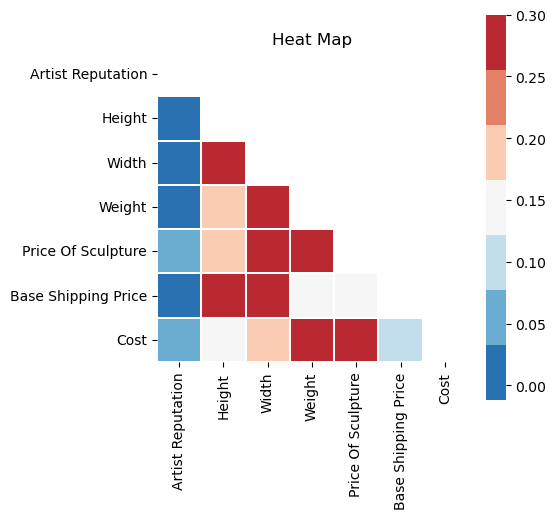

In [7]:
sub_data = shipping_data_copy[['Artist Reputation','Height','Width','Weight','Price Of Sculpture','Base Shipping Price','Cost']]

f, ax = plt.subplots(figsize=(5, 5))
mask = np.zeros_like(sub_data.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(sub_data.corr(), mask=mask, vmax=.3, linewidth=0.1, square=True, cmap=sns.color_palette("RdBu_r", 7));
ax.set_title("Heat Map")

In [8]:
sub_data.corr()[["Cost"]]

,Cost
Artist Reputation,0.071390
Height,0.155878
Width,0.204550
Weight,0.601270
Price Of Sculpture,0.701189
Base Shipping Price,0.104847
Cost,1.000000


In [9]:
sub_data.to_csv("Shipping_Details_Sub_Data_Clustering.csv")

In [10]:
shipping_data_dummy = pd.read_csv("Shipping_Details_Sub_Data_Clustering.csv")
shipping_data_dummy.drop(columns=shipping_data_dummy.columns[0], axis=1,  inplace=True)
shipping_data_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6495 entries, 0 to 6494
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Artist Reputation    6495 non-null   float64
 1   Height               6495 non-null   float64
 2   Width                6495 non-null   float64
 3   Weight               6495 non-null   float64
 4   Price Of Sculpture   6495 non-null   float64
 5   Base Shipping Price  6495 non-null   float64
 6   Cost                 6495 non-null   float64
dtypes: float64(7)
memory usage: 355.3 KB


In [11]:
scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(shipping_data_dummy)

normalized_df = pd.DataFrame(normalized_data, columns=sub_data.columns)

normalized_df.describe()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
count,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000
mean,0.460234,0.266467,0.155450,0.003042,0.002982,0.304484,0.003556
std,0.249996,0.165960,0.107812,0.021399,0.022484,0.298671,0.033180
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.270000,0.142857,0.083333,0.000005,0.000006,0.074461,0.000037
50%,0.450000,0.242857,0.125000,0.000027,0.000013,0.149922,0.000098
75%,0.640000,0.371429,0.187500,0.000300,0.000224,0.532452,0.000337
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
normalized_df.corr()[["Cost"]]

,Cost
Artist Reputation,0.071390
Height,0.155878
Width,0.204550
Weight,0.601270
Price Of Sculpture,0.701189
Base Shipping Price,0.104847
Cost,1.000000


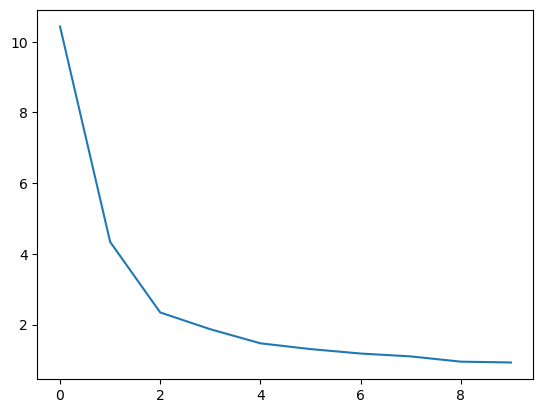

In [13]:
test_df = normalized_df[['Price Of Sculpture','Cost']]

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

inertias=[]
for k in range(1, 11):  
    clf= KMeans(n_clusters=k, **kmeans_kwargs)
    clf.fit(test_df)     
    inertias.append(clf.inertia_)

plt.plot(inertias)

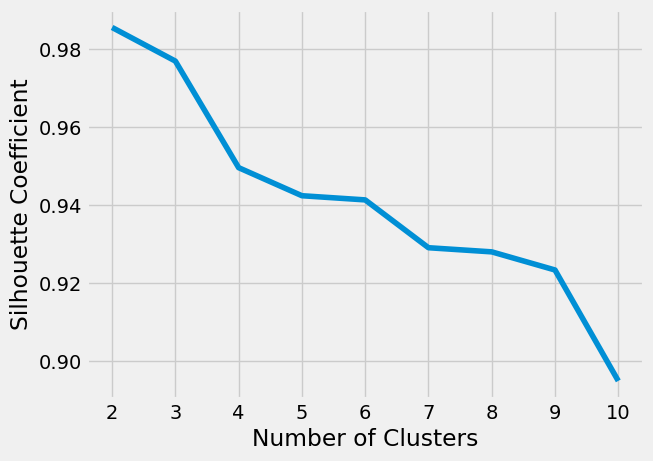

In [14]:
silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(test_df)
    score = silhouette_score(test_df, kmeans.labels_)
    silhouette_coefficients.append(score)
    
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

/var/folders/t7/1gj7tf5j31l_rj3z115b_ty80000gn/T/ipykernel_47916/2677586721.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['cluster'] = kmeans.labels_


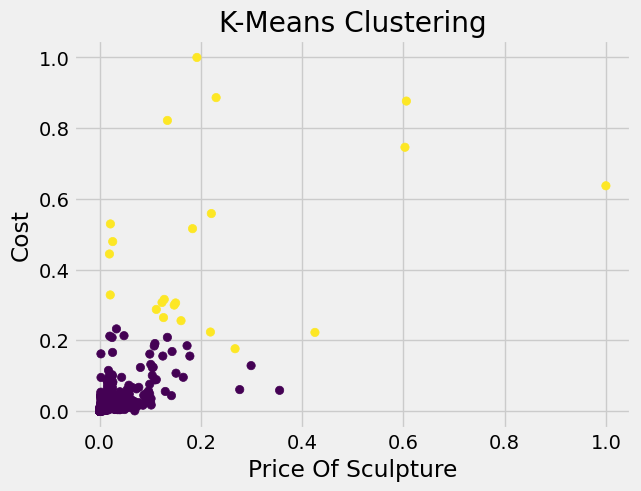

In [15]:
kmeans = KMeans(n_clusters=2).fit(test_df)

# Add cluster labels to DataFrame
test_df['cluster'] = kmeans.labels_

# Visualize the clusters using a scatter plot
plt.scatter(test_df['Price Of Sculpture'], test_df['Cost'], c=test_df['cluster'])
plt.xlabel('Price Of Sculpture')
plt.ylabel('Cost')
plt.title('K-Means Clustering')
plt.show()